In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Chargement du dataset exporté à l'étape précédente
DATA_PATH = Path("data/processed/dataset_cleaned.csv")
df = pd.read_csv(DATA_PATH)

X = df.drop(columns=["valve_ok"])
y = df["valve_ok"]

print(f"Dimensions actuelles : {X.shape}")

Dimensions actuelles : (2205, 140)


En supprimant les colonnes corrélées , vous aidez le modèle à ne pas donner trop de poids à une information redondante.

In [2]:
# Calcul de la matrice de corrélation
corr_matrix = X.corr().abs()

# Sélection du triangle supérieur de la matrice
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identification des colonnes avec une corrélation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f"Nombre de colonnes redondantes à supprimer : {len(to_drop)}")
X_reduced = X.drop(columns=to_drop)

Nombre de colonnes redondantes à supprimer : 50


Importance des Features (via Random Forest)

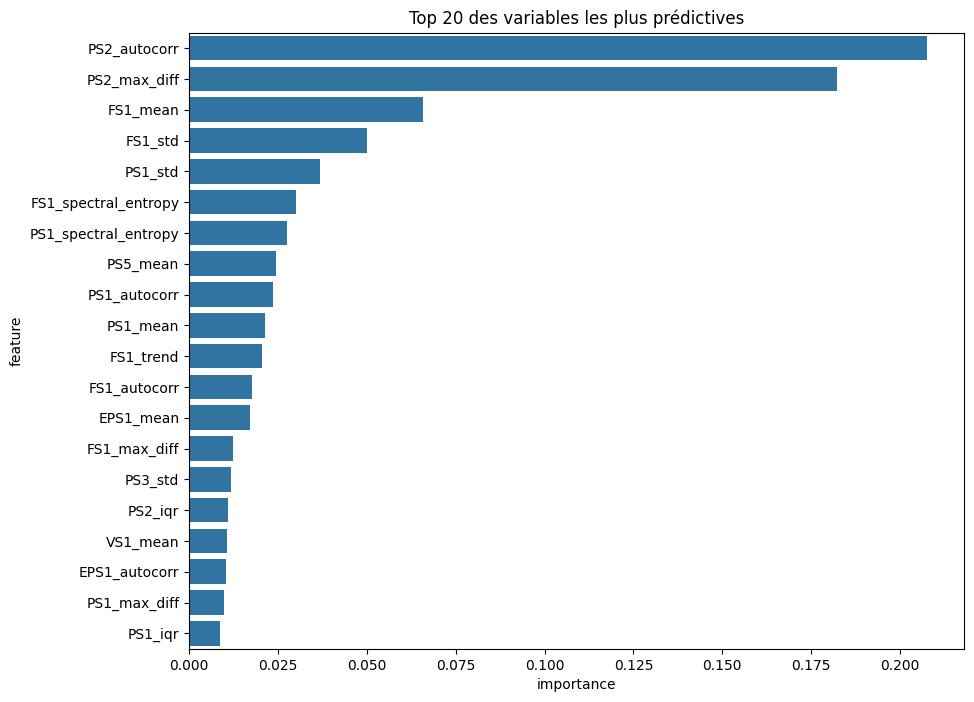

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement d'un modèle rapide pour l'importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_reduced, y)

# Création d'un DataFrame pour visualiser l'importance
feature_importance = pd.DataFrame({
    'feature': X_reduced.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)



# Visualisation des 20 meilleures features
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title("Top 20 des variables les plus prédictives")
plt.show()

On décide de ne garder que les variables qui contribuent de manière significative (ex: celles dont l'importance cumulée atteint 90%)

In [4]:
# Sélection des features ayant une importance > seuil (ex: 0.005)
threshold = 0.005
selected_features = feature_importance[feature_importance['importance'] > threshold]['feature'].tolist()

X_final = X_reduced[selected_features]
print(f"Nombre de features finales conservées : {len(selected_features)}")

Nombre de features finales conservées : 33


In [5]:
# Reconstruction du DataFrame avec la cible
df_final = X_final.copy()
df_final['valve_ok'] = y.values

# Exportation
FINAL_DATA_PATH = Path("data/processed/dataset_final.csv")
df_final.to_csv(FINAL_DATA_PATH, index=False)

print(f"Dataset prêt pour le ML sauvegardé ici : {FINAL_DATA_PATH}")

Dataset prêt pour le ML sauvegardé ici : data\processed\dataset_final.csv
